# 1. Importamos librerias necesarias

In [44]:
#Manejo de datos
import numpy as np
import pandas as pd

#Sklearn
#Preprocesamiento
from sklearn.preprocessing import LabelEncoder

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree

from sklearn.metrics import accuracy_score, confusion_matrix

#Visualización
import seaborn as sns
import matplotlib.pyplot as plt



# 2 Cargamos la data

In [45]:
df = pd.read_csv("heart4.csv")

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Como queremos mostrar como funciona la poda, no entraremos a hacer EDAs

In [49]:
X = df.drop(columns=["Target"])
y = df['Target']


In [50]:
X.shape, y.shape

((297, 13), (297,))

# 3. Separamos la data

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,y, stratify=y)

# strtify se utiliza para asegurar que los 
#subconjuntos de entrenamiento y prueba tengan 
#la misma proporción de clases que el conjunto de datos original.


In [52]:
x_train.shape , x_test.shape

((222, 13), (75, 13))

# 4. Aplicamos el modelo con la data cruda


In [53]:
clf = tree.DecisionTreeClassifier(random_state = 8)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)



# 5 Visualizamos el arbol

[Text(0.45230263157894735, 0.9545454545454546, 'thal <= 4.5\ngini = 0.497\nsamples = 222\nvalue = [120, 102]\nclass = No HD'),
 Text(0.22697368421052633, 0.8636363636363636, 'thalach <= 111.5\ngini = 0.341\nsamples = 124\nvalue = [97, 27]\nclass = No HD'),
 Text(0.20065789473684212, 0.7727272727272727, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = HD'),
 Text(0.2532894736842105, 0.7727272727272727, 'oldpeak <= 2.9\ngini = 0.293\nsamples = 118\nvalue = [97, 21]\nclass = No HD'),
 Text(0.22697368421052633, 0.6818181818181818, 'age <= 55.5\ngini = 0.254\nsamples = 114\nvalue = [97, 17]\nclass = No HD'),
 Text(0.13157894736842105, 0.5909090909090909, 'ca <= 2.5\ngini = 0.111\nsamples = 68\nvalue = [64, 4]\nclass = No HD'),
 Text(0.10526315789473684, 0.5, 'trestbps <= 113.5\ngini = 0.086\nsamples = 67\nvalue = [64, 3]\nclass = No HD'),
 Text(0.07894736842105263, 0.4090909090909091, 'ca <= 0.5\ngini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = No HD'),
 Text(0.05263157894736842, 0.318

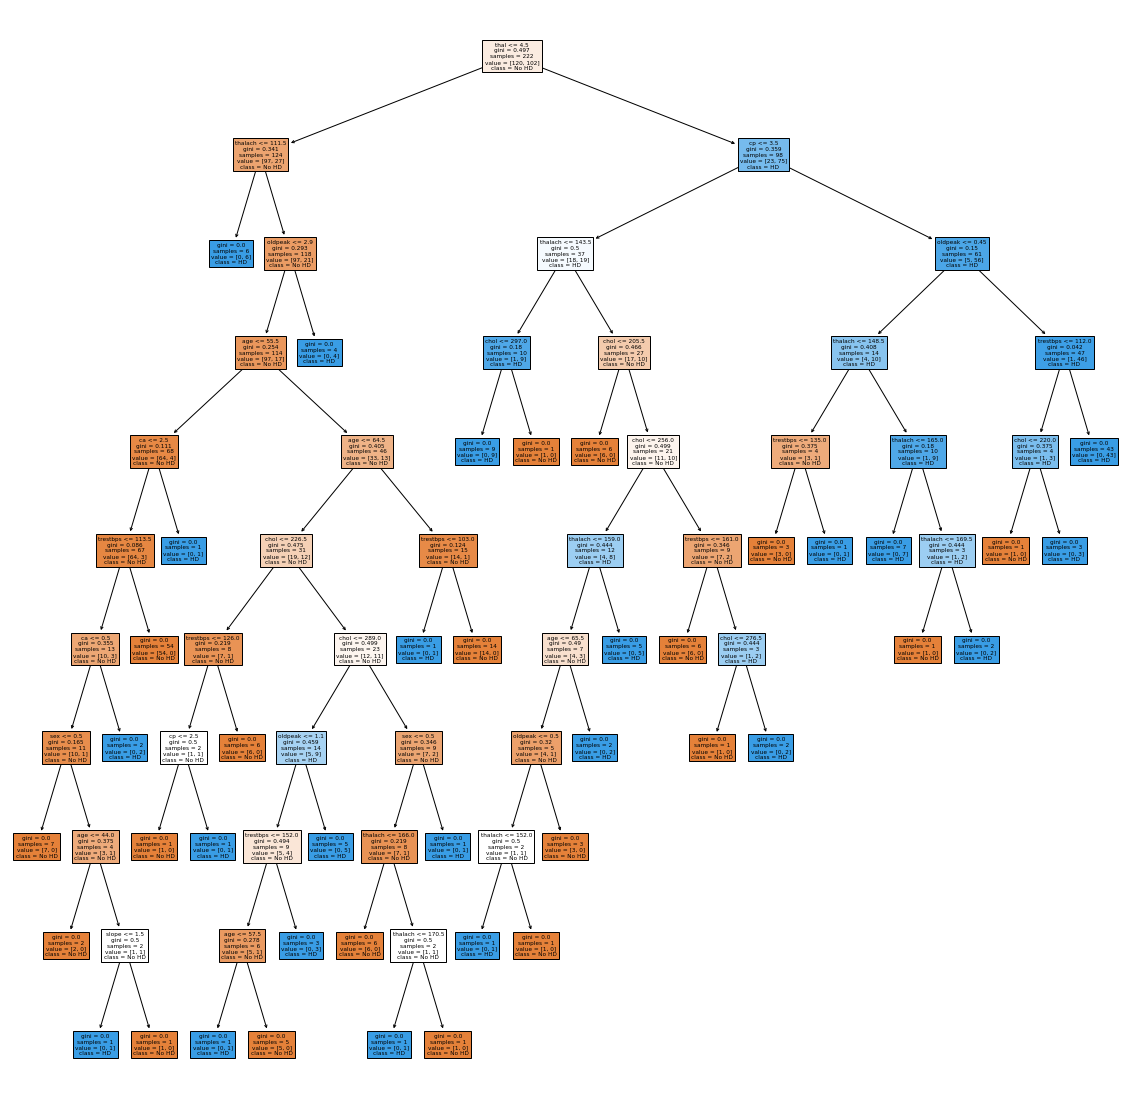

In [54]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['No HD', 'HD']
tree.plot_tree(clf, feature_names = features, class_names = classes, filled = True)



#### Haremos una función que nos ayudará a graficar matrices de confusión

In [55]:
def confusion_matrix_plot(y_train_pred, y_train, tipo):
    print(tipo , "Matriz de Confusión")
    cf = confusion_matrix(y_train_pred, y_train)
    sns.heatmap(cf, annot = True, yticklabels = classes, xticklabels = classes, cmap='Blues', fmt='g')
    plt.tight_layout

In [56]:
#Obtenemos las precisiones tanto para entrenamiento como para test
train_score = accuracy_score(y_train_pred, y_train)
test_score = accuracy_score(y_test_pred, y_test)

In [57]:
print('Accuracy en Train: ', train_score)
print('Accuracy en Test: ', test_score)

Accuracy en Train:  1.0
Accuracy en Test:  0.6266666666666667


#### Claramente se ve que hay sobreajuste y lo confirmaremos con una matriz de confusión

Entrenamiento Matriz de Confusión


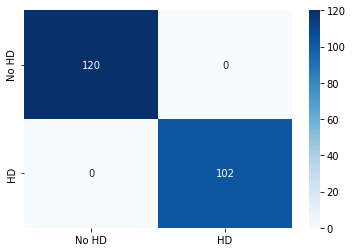

In [58]:
confusion_matrix_plot(y_train_pred, y_train, 'Entrenamiento')

Prueba Matriz de Confusión


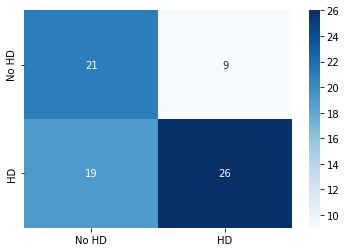

In [59]:
confusion_matrix_plot(y_test_pred, y_test, 'Prueba')

# Tecnicas de Pre-Poda 

In [60]:
#Pre poda es evitar que el arbol se extienda mucho mas
#Podemos poner condiciones
#Parametros importantes
#     max_depth
#.    min_sample_split (Numero minimo de muestras que son requeridas para un nodo interno)
#.    min_samples_leaf (Minimo de muestrar para ser considerado un nodo hoja)

#Una manera de hacerlo es por Grid Search, veremos que parametro es el que da mejor resultado en test

In [61]:
params = {
    'max_depth' : [2,4,6,8,10,12],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2]
}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid = params)
gcv.fit(x_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [62]:
model = gcv.best_estimator_
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print('Accuracy en Train: ', accuracy_score(y_train_pred, y_train))
print('Accuracy en Test: ', accuracy_score(y_test_pred, y_test))



Accuracy en Train:  0.8603603603603603
Accuracy en Test:  0.7733333333333333


Entrenamiento Matriz de Confusión


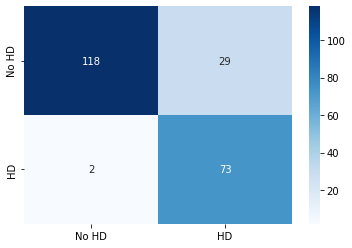

In [63]:
confusion_matrix_plot(y_train_pred, y_train, 'Entrenamiento')

Test Matriz de Confusión


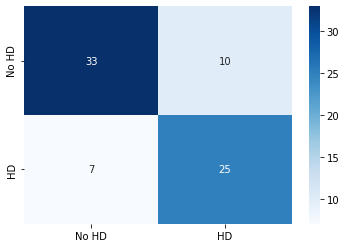

In [64]:
confusion_matrix_plot(y_test_pred, y_test, 'Test')

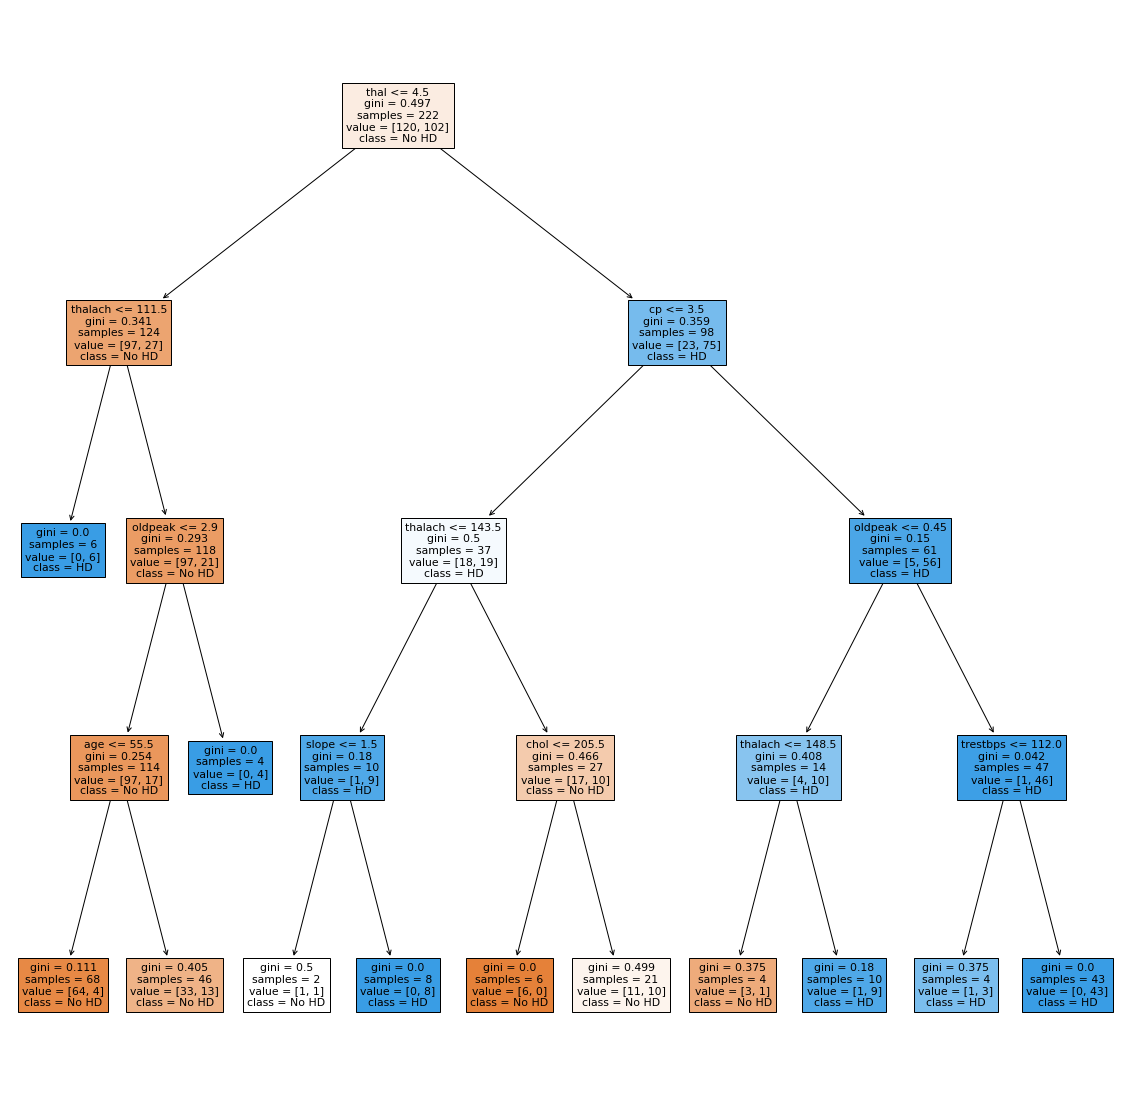

In [65]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['No HD','HD']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

# Post Pruning


In [ ]:
#Cost Complexity Pruning

#Queremos cortar las ramas de tal manera que nuestro modelo sea mejor para generalizar.
#Para esto hay que probar el parametro alpha, lo cual indica que un balance entre que tan grande es el arbol
# y que tan bien predice

#Si alpha es bajo permite un arbol grande
#Si alpha es alto permite un arbol mas pequeño y simple, pero funciona bien en general

#Probamos distintos valores de alpha para encontrar el mejor arbol podado

### Calculamos las alphas

In [66]:


path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.0036036  0.00394144 0.00394144 0.00405405 0.004095
 0.00440866 0.00600601 0.00613113 0.00675676 0.00750751 0.00800801
 0.00810811 0.00823681 0.00840841 0.00857542 0.00858001 0.00883532
 0.00915201 0.00921385 0.00935058 0.00953334 0.01237945 0.01844096
 0.0252054  0.03395165 0.03475906 0.147857  ]


### Para cada alpha vamos a generar un modelo y lo metermeos a una lista

In [67]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

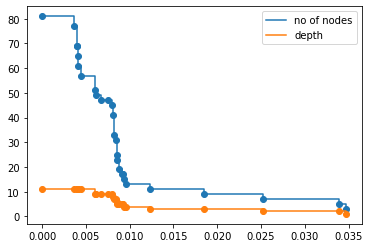

In [69]:
#clfs = clfs[:-1]
#ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

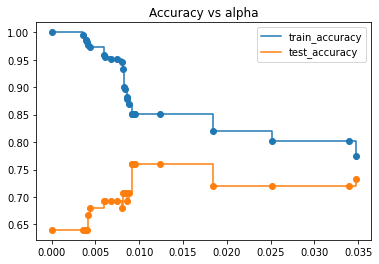

In [70]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()


In [71]:
#Escogemos el que mejor nos de en este caso 0.015

Train score  0.8513513513513513
Test score  0.76
Train Matriz de Confusión


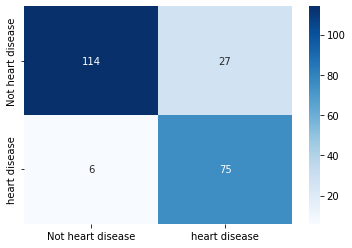

In [80]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.015)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print('Train score ',accuracy_score(y_train_pred,y_train))
print('Test score ', accuracy_score(y_test_pred,y_test))
confusion_matrix_plot(y_train_pred,y_train,'Train')


Test Matriz de Confusión


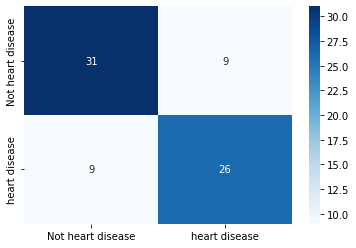

In [81]:
confusion_matrix_plot(y_test_pred,y_test,'Test')

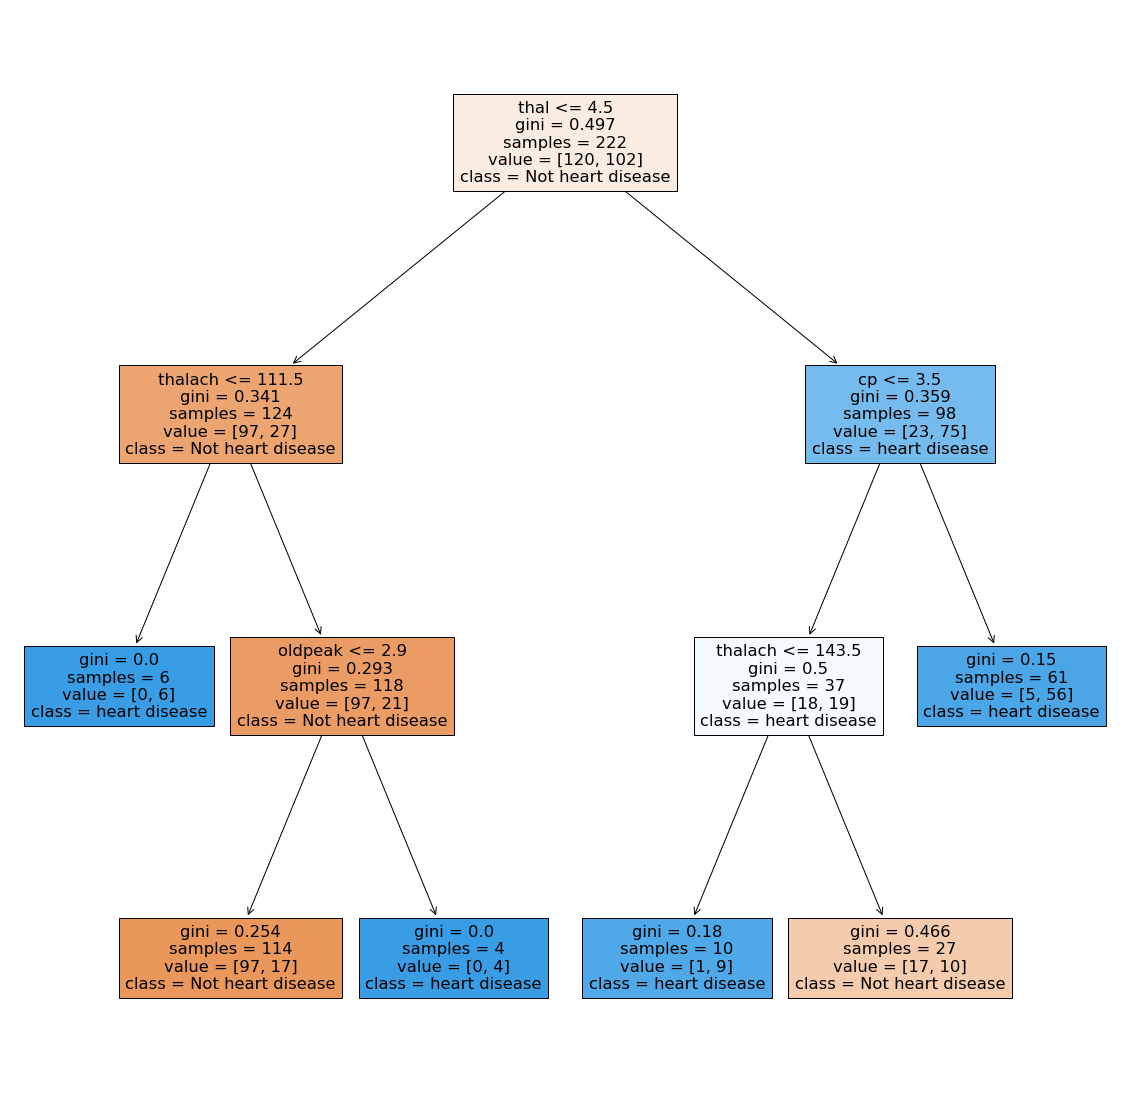

In [82]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()